## Ley de Zipf

Ley de Zipf dice que la frecuencia de ocurrencia de las palabras en un texto es proporcional al reciprocal del rango (en ocurrencia) de la palabra. Aqui quiero testear, si Ley de Zipf es aproximamente valido para articulo de wikipedia con mas palabras en ingles.

In [1]:
# Cargamos la librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import wikipedia
import re

In [3]:
# wikipedia en ingles
wikipedia.set_lang("es")

In [4]:
# Uno de los articulos con mas palabras en ingles es el articulo sobre "Literatura victoriana"
print(wikipedia.search("Literatura victoriana"))

['Literatura victoriana', 'Época victoriana', 'Literatura modernista', 'Estilo victoriano', 'Literatura de las Filipinas en español', 'Kate Morton', 'Literatura árabe', 'Javier Casis', 'Literatura en yidis', 'Literatura de México']


In [5]:
wiki = wikipedia.page('Literatura victoriana')

In [6]:
# Cargamos el contento de la pagina
text = wiki.content

In [7]:
text = re.sub(r'==.*?==+', ' ', text) # eliminamos los headers
text = text.replace('\n', ' ') # eliminamos los saltos de línea
text = text.replace("\'","'")
text = text.replace("—"," ")
text = text.replace("-"," ")
text = text.replace("."," ")
text = text.replace(" '"," ")
text = text.replace("' "," ")
""" Aqui es importante replazar simbolos especiales con espacios """

' Aqui es importante replazar simbolos especiales con espacios '

In [8]:
# Vamos a filtrar los simbolos por letras y numeros
string_value = text
string_value=''.join([x for x in string_value if (x.isalnum() or x==' ' or x=="'")])
# Ahora podemos usar .split() para obtaner palabras
sv_list=string_value.split()
# Finalmente eliminamos los elementos de lista vacios
s=sv_list
s=[x.lower() for x in s if (x!='' or x!="'")]
# Creamos una lista de palabras
words=list(set(s))
print('Numero de palbras unicas:',len(words))
# Contamos palabras
word_counts=[s.count(x) for x in words]

Numero de palbras unicas: 12227


In [9]:
# Una lista de rangos de palabras
numbers=list(np.arange(1,len(words)+1))
# Una lista de frecuencias en el texto
number_counts=sorted(word_counts,reverse=True)
# Expectacion teorica de las frecuen
number_theo=number_counts[0]*np.array([1/x for x in numbers])

In [10]:
# Una dataframe con rangos de palabras y frecuencias
numbers_w_df=pd.DataFrame(list(zip(numbers,sorted(word_counts,reverse=True))),columns=['word rank','count'])
numbers_w_df.head()

,word rank,count
0,1,5285
1,2,2931
2,3,2764
3,4,2588
4,5,1850


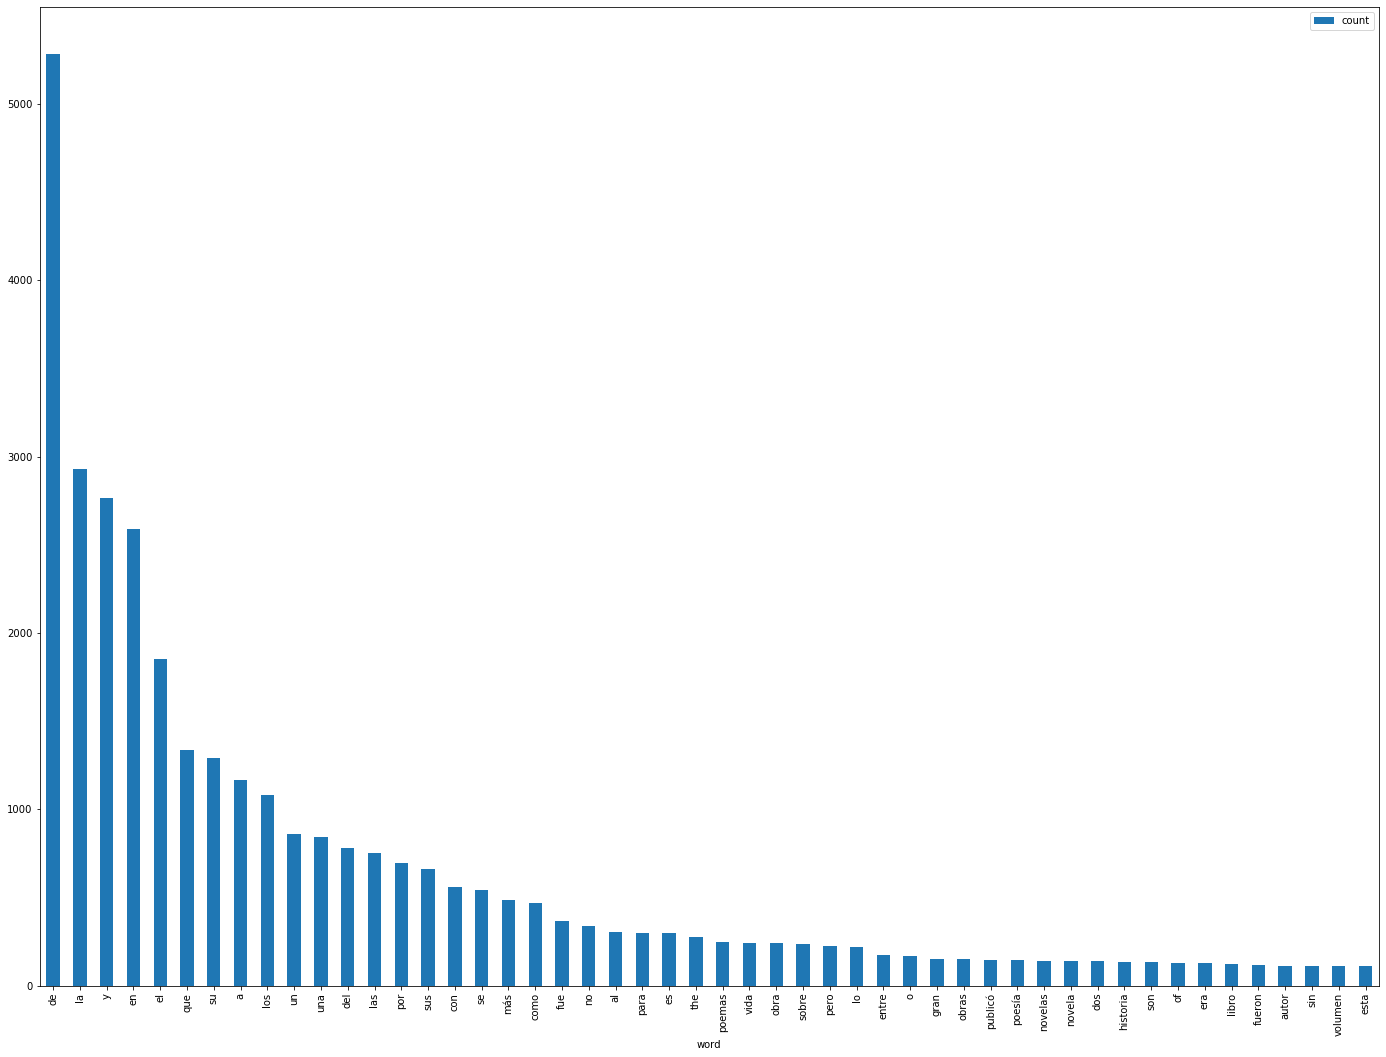

In [11]:
# Una dataframe con las palabras y frecuencias
words_df=pd.DataFrame(list(zip(words,word_counts)),columns=['word','count']).sort_values(by='count',ascending=False)
# Y un bar plot de frecuencia de palabras
words_df[0:50].plot(x='word',y='count',kind='bar',figsize=(24,18))

slope -0.9401665353698341 displacement 8.55938742672771


(array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
        1.e+05, 1.e+06, 1.e+07]),
 <a list of 11 Text yticklabel objects>)

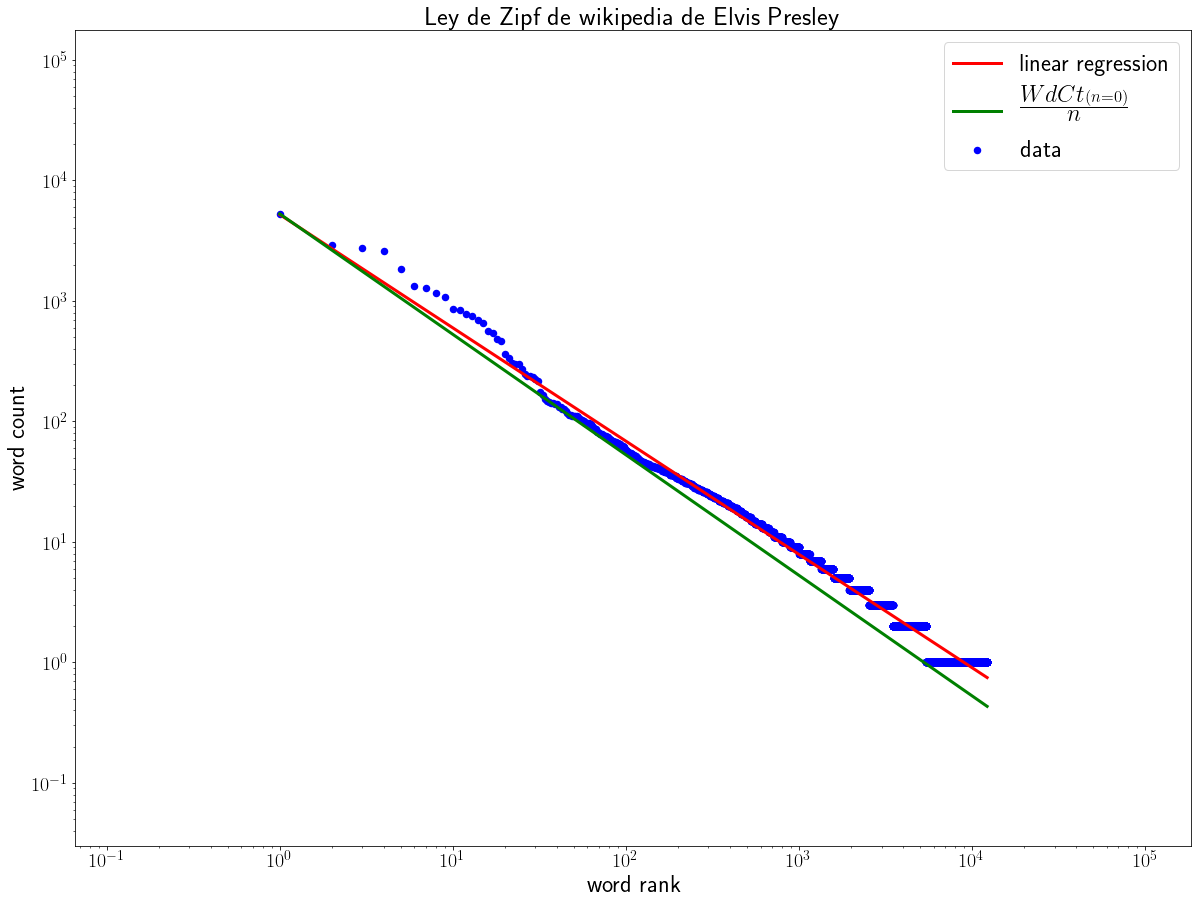

In [12]:
# Aqui trazamos los resultados

# Para usar tex en el plot
plt.rcParams['text.usetex'] = True

# Los valores des ejes X, Y1 (experimental), Y2 (teorico) en valores logaritmicos para hacer regresion linear y tazar los valores correctamente
X = np.log(np.array(numbers))
Y1 = np.log(np.array(sorted(word_counts,reverse=True)))
Y2 = np.log(number_theo)

# Una regresion linear de los valores
m, b = np.polyfit(X, Y1, 1)

# Aqui vemos los parametros de regresion linear
print('slope',m,'displacement',b)

# Las tazas del plot
plt.rcParams["figure.figsize"] = (20,15)

# Ejes logaritmicos
plt.xscale('log')
plt.yscale('log')

# Los plots
plt.scatter(np.exp(X),np.exp(Y1),color='b',linewidth=1.5,label='data')
plt.plot(np.exp(X),np.exp(m*X+b),color='r',linewidth=3,label='linear regression')
plt.plot(np.exp(X),np.exp(Y2),color='g',linewidth=3,label=r'$\frac{{\displaystyle WdCt}\left(n=0\right)}{\displaystyle n}$')
# El titulo de plot
plt.title('Ley de Zipf de wikipedia de Elvis Presley',fontsize=26)
# La leyenda
plt.legend(fontsize=24)
# Nombres de ejes
plt.xlabel('word rank',fontsize=24)
plt.ylabel('word count',fontsize=24)
# Los 'ticks' mas grandes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

Hay una desviacion de Ley de Zipf, pero no es muy grande. He observado que la mejora del filtrado de caracteres especiales mejora el resultado.